In [1]:
import argparse
import getopt
import pandas
import sys
from pathlib import Path

def mainModeValueCounts(dataFrame, seriesName):
    "This does things"
    counts = dataFrame['mainMode'].value_counts() * 100
    counts.name = seriesName  # rename doesn't seem to work, so just assign things here
    return counts


def getRelative(dataFrame, changedColumns):
    "this also does things"
    result = dataFrame.copy()
    for name in changedColumns:
        result[name] = dataFrame[name] / dataFrame[name].sum()

    return result


def read_csv(listOfCsv, listOfNames):
    "This function reads supplied csvs and aggregates modal shares"
    modalSplits = []
    for file in listOfCsv:
        csv = pandas.read_csv(file, usecols=['mainMode'])
        valueCounts = mainModeValueCounts(csv, listOfNames[len(modalSplits)])
        modalSplits.append(valueCounts)
    return modalSplits

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-e', '--expected')
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)
    


In [2]:
print(sys.argv)

dataPath = 'C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\'
expected = 'Vergleich'
args = parse_args([
    '-e', dataPath + 'expected-modal-share.csv', 
    '-f', dataPath + 'base-case.csv', dataPath + 'deurbanisation.csv',
    '-n', 'Basisfall', 'Deurbanisierung' 
])
print(args)

expectedModalShare = pandas.read_csv(args.expected, index_col='mode')

modalSplits = read_csv(args.files, args.names)
modalSplits.insert(0, expectedModalShare)

modalShare = pandas.concat(modalSplits, axis=1, sort=False).rename(
    columns={'value': expected})

print(modalShare)


['c:\\users\\janekdererste\\pycharmprojects\\matsim-analysis\\venv\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Janekdererste\\AppData\\Roaming\\jupyter\\runtime\\kernel-fbea937a-9e23-4209-9ef7-aa883835f03f.json']
Namespace(expected='C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\expected-modal-share.csv', files=['C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\base-case.csv', 'C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\deurbanisation.csv'], names=['Basisfall', 'Deurbanisierung'])
      Vergleich  Basisfall  Deurbanisierung
pt    1572802.0  1645200.0          1421200
car   5667224.0  5714400.0          4721100
ride  1488973.0  1481000.0          1451500
walk  2909159.0  3544600.0          3567300
bike  1246226.0  1187500.0          1899300
drt         NaN        NaN           358900


In [3]:
numberOfTrips = modalShare.aggregate(sum)

print('number of trips by scenario')
print(numberOfTrips)

number of trips by scenario
Vergleich          12884384.0
Basisfall          13572700.0
Deurbanisierung    13419300.0
dtype: float64


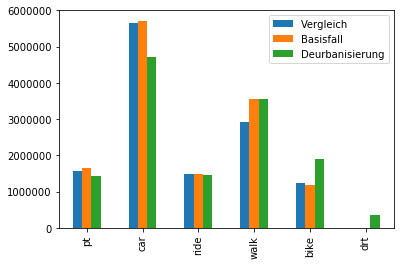

In [4]:
# plot absolute
modalShare.plot.bar()

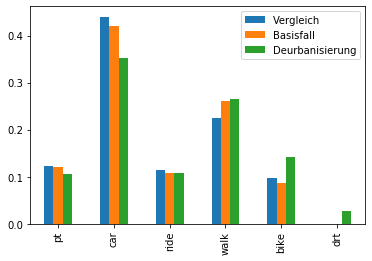

In [5]:
# copy the scenario names
columns = args.names.copy()
columns.insert(0, expected)

# create a data frame with relative values and plot it
relative = getRelative(modalShare, columns)
relative.plot.bar()

